#Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
import gc

In [2]:
train = pd.read_csv("pATH+rain_u6lujuX_CVtuZ9i (2).csv") 
test = pd.read_csv("PATH+test_Y3wMUE5_7gLdaTN (1).csv") 

In [3]:
gc.get_count()

(224, 2, 1)

In [4]:
gc.collect() # forcefully removing unused memory
gc.get_count()

(36, 0, 0)

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# UNIVARIATE ANALYSIS

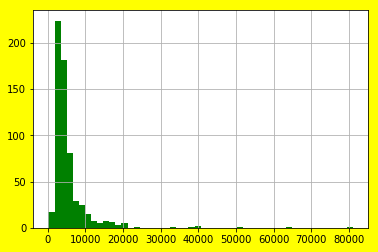

In [8]:
plt.rcParams['figure.facecolor'] = 'yellow'
train['ApplicantIncome'].hist(bins=50,color='g')


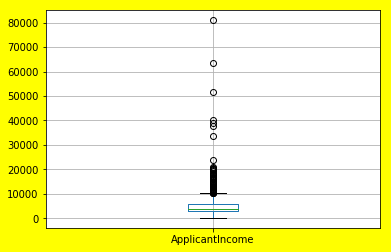

In [9]:
train.boxplot(column='ApplicantIncome')

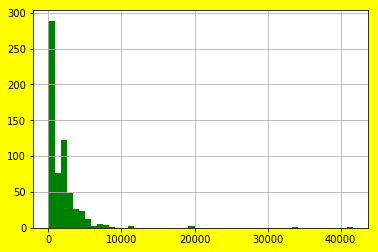

In [10]:
train['CoapplicantIncome'].hist(bins=50,color='g')


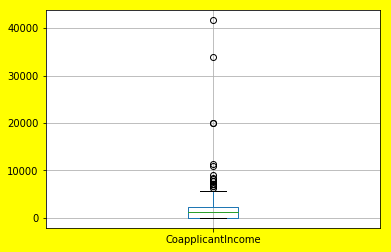

In [11]:
train.boxplot(column='CoapplicantIncome')

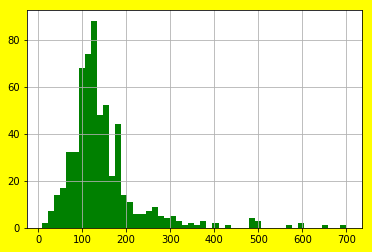

In [12]:
train['LoanAmount'].hist(bins=50,color='g')


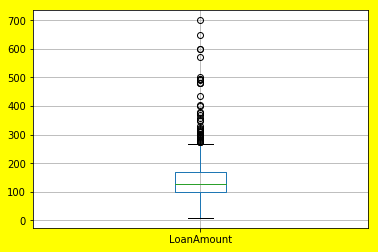

In [13]:
train.boxplot(column='LoanAmount')

# TARGET DISTRIBUTION

In [14]:
temp1 = pd.crosstab(index=train['Loan_Status'],columns='count')
temp2 = temp1/temp1.sum()
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

col_0        count
Loan_Status       
N              192
Y              422

Probility of getting loan for each Credit History class:
col_0           count
Loan_Status          
N            0.312704
Y            0.687296


In [15]:
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

# BIVARIATE ANALYSIS

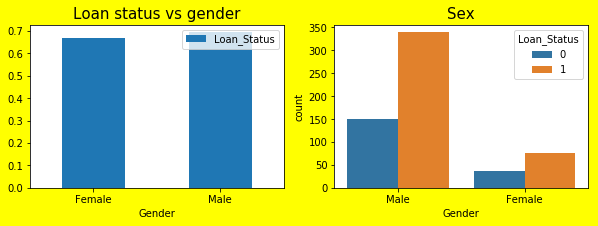

In [16]:
# Gender vs lOAN STATUS
train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(10,3))
train[['Gender','Loan_Status']].groupby(['Gender']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs gender',fontsize='15')
sns.countplot('Gender',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

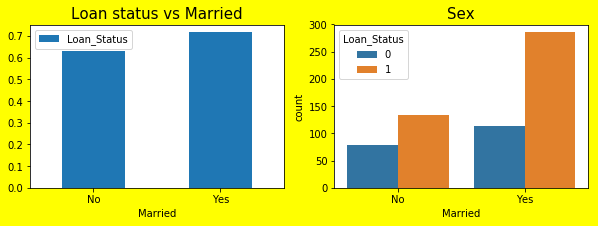

In [17]:
# Marital_status vs lOAN STATUS
train.groupby(['Married','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(10,3))
train[['Married','Loan_Status']].groupby(['Married']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs Married',fontsize='15')
sns.countplot('Married',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

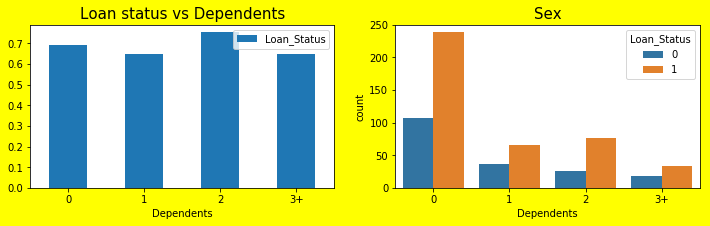

In [18]:
# Dependents vs lOAN STATUS
train.groupby(['Dependents','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(12,3))
train[['Dependents','Loan_Status']].groupby(['Dependents']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs Dependents',fontsize='15')
sns.countplot('Dependents',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

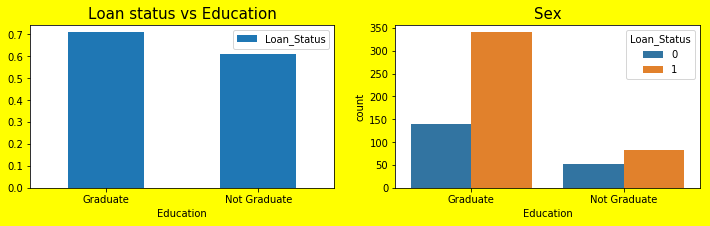

In [19]:
# Education vs lOAN STATUS
train.groupby(['Education','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(12,3))
train[['Education','Loan_Status']].groupby(['Education']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs Education',fontsize='15')
sns.countplot('Education',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

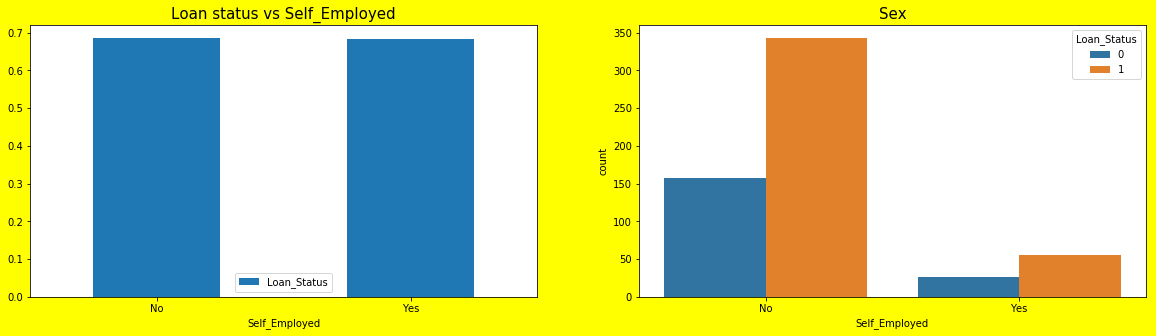

In [20]:
# Self_Employed vs lOAN STATUS
train.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(20,5))
train[['Self_Employed','Loan_Status']].groupby(['Self_Employed']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs Self_Employed',fontsize='15')
sns.countplot('Self_Employed',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

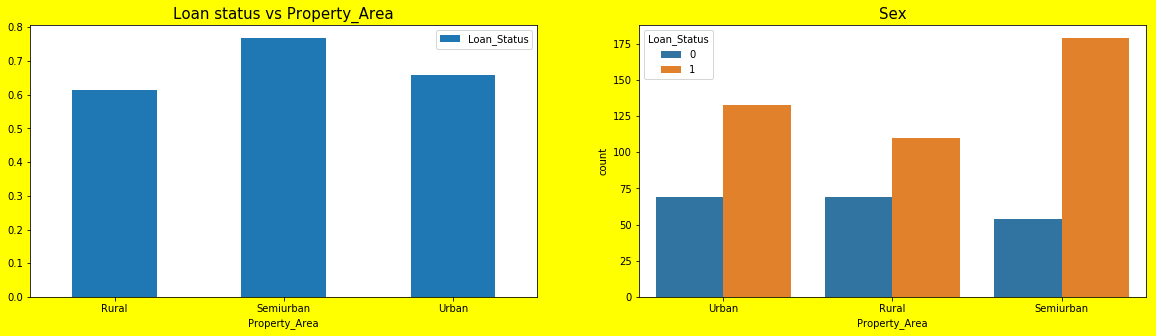

In [21]:
# Property_Area vs lOAN STATUS
train.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()
#Visualizing with graph
f,ax=plt.subplots(1,2,figsize=(20,5))
train[['Property_Area','Loan_Status']].groupby(['Property_Area']).mean().plot.bar(ax=ax[0],rot=0)
ax[0].set_title('Loan status vs Property_Area',fontsize='15')
sns.countplot('Property_Area',hue='Loan_Status',data=train,ax=ax[1])
ax[1].set_title('Sex',fontsize='15')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split 

# read the test files 

test['is_test'] = 1 
test['is_train'] = 0
train['is_test'] = 0
train['is_train'] = 1

# target variable
Y = train['Loan_Status']
train_X = train

# test ID
test_id = test['Loan_ID']
test_X = test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

In [23]:
# checking missing data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,367,37.410805
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810
is_train,0,0.000000
is_test,0,0.000000


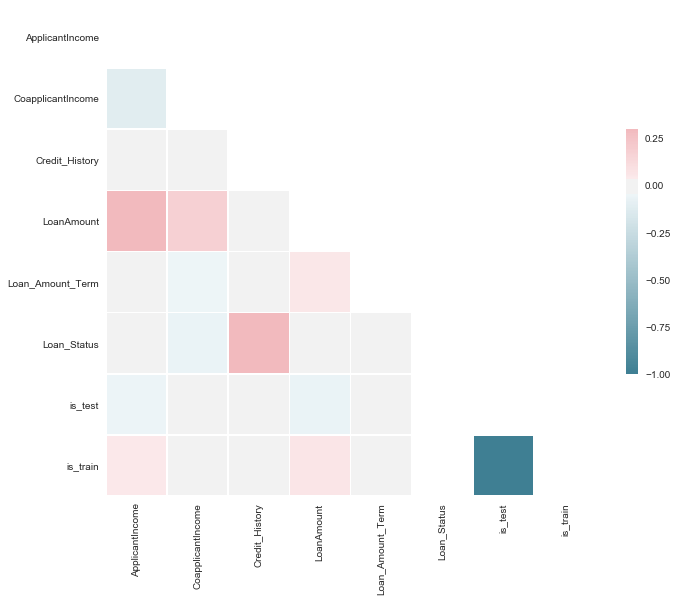

In [24]:
# CORRELATION
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# IMPUTING MISSING VALUES

In [25]:
from statistics import mode
# Imputing credut hisory with mode
data['Credit_History']=data['Credit_History'].fillna(mode(data['Credit_History']))

# Imputing Self employed hisory with mode
data['Self_Employed']=data['Self_Employed'].fillna(mode(data['Self_Employed']))

# Imputing Loan amount with median
median_value_loan=data['LoanAmount'].median()
data['LoanAmount']=data['LoanAmount'].fillna(median_value_loan)

# Imputing dependents with mode
mode(data['Dependents'])
data['Dependents']=data['Dependents'].fillna(mode(data['Dependents']))

# Imputing Gender with mode
data['Gender']=data['Gender'].fillna(mode(data['Gender']))

# Imputing Loan amount term with mean
median_value_loan_term=data['Loan_Amount_Term'].median()
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(median_value_loan_term)

# Imputing  married with mode
data['Married']=data['Married'].fillna(mode(data['Married']))

# checking missing data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,367,37.410805
is_train,0,0.000000
is_test,0,0.000000
Self_Employed,0,0.000000
Property_Area,0,0.000000
Married,0,0.000000
Loan_ID,0,0.000000
Loan_Amount_Term,0,0.000000
LoanAmount,0,0.000000
Gender,0,0.000000


In [26]:
#Dropping Loan_id
data = data.drop(['Loan_ID'], axis = 1)

In [27]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,is_test,is_train
0,5849,0.0,1.0,0,Graduate,Male,126.0,360.0,1.0,No,Urban,No,0,1
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,0.0,Yes,Rural,No,0,1
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,1.0,Yes,Urban,Yes,0,1
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,1.0,Yes,Urban,No,0,1
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,1.0,No,Urban,No,0,1


In [28]:
data['Credit_History'] = data['Credit_History'].astype('object')

# FEATURE ENGINEERING

In [29]:
## adding ApplicantIncome buckets, classes based on Standard Deviation and Quartile Ranges
data['ApplicantIncome_buckets'] = data.ApplicantIncome
data['ApplicantIncome_buckets'][data.ApplicantIncome >= 14000] = 'Very High'
data['ApplicantIncome_buckets'][(data.ApplicantIncome >= 5700) & (data.ApplicantIncome < 14000)] = 'High'
data['ApplicantIncome_buckets'][(data.ApplicantIncome >= 3700) & (data.ApplicantIncome < 5700)] = 'Average High'
data['ApplicantIncome_buckets'][(data.ApplicantIncome >= 2700) & (data.ApplicantIncome < 3700)] = 'Average Low'
data['ApplicantIncome_buckets'][(data.ApplicantIncome >= 1600) & (data.ApplicantIncome < 2700)] = 'Low'
data['ApplicantIncome_buckets'][data.ApplicantIncome < 1600] = 'Very Low'



In [30]:
## adding CoapplicantIncome buckets, classes based on Standard Deviation and Quartile Ranges
data['CoapplicantIncome_buckets'] = data.CoapplicantIncome
data['CoapplicantIncome_buckets'][data.CoapplicantIncome >= 2200] = 'High'
data['CoapplicantIncome_buckets'][(data.CoapplicantIncome >= 700) & (data.CoapplicantIncome < 2200)] = 'Average'
data['CoapplicantIncome_buckets'][data.CoapplicantIncome < 700] = 'Low'



In [31]:
## adding LoanAmount buckets, classes based on Standard Deviation and Quartile Ranges
data['LoanAmount_buckets'] = data.LoanAmount
data['LoanAmount_buckets'][data.LoanAmount >= 260] = 'Very High'
data['LoanAmount_buckets'][(data.LoanAmount >= 160) & (data.LoanAmount < 260)] = 'High'
data['LoanAmount_buckets'][(data.LoanAmount >= 120) & (data.LoanAmount < 160)] = 'Average High'
data['LoanAmount_buckets'][(data.LoanAmount >= 90) & (data.LoanAmount < 120)] = 'Average Low'
data['LoanAmount_buckets'][(data.LoanAmount >= 50) & (data.LoanAmount < 90)] = 'Low'
data['LoanAmount_buckets'][data.LoanAmount < 50] = 'Very Low'

In [32]:
data.drop(['LoanAmount','CoapplicantIncome','ApplicantIncome'],axis=1,inplace=True)

# PREPARING DATA FOR MODELLING

In [33]:
#### prepare final Train X and Test X dataframes 
ignore_features = ['is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

In [34]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 


In [35]:
# get categorical features
train_df_cats = _get_categorical_features(trainX)
train_df_cats

['Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'Married',
 'Property_Area',
 'Self_Employed',
 'ApplicantIncome_buckets',
 'CoapplicantIncome_buckets',
 'LoanAmount_buckets']

In [36]:
# factorize the categorical features from train data
train_df = _factorize_categoricals( trainX, train_df_cats)
#CREATING DUMMIES
train_df = _get_dummies( trainX, train_df_cats)

In [37]:
# DROPPING COLUMNS
train_df.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','ApplicantIncome_buckets','CoapplicantIncome_buckets','LoanAmount_buckets'],axis=1,inplace=True)

In [38]:
# TEST SET
# get categorical features
test_df_cats = _get_categorical_features(testX)
test_df_cats

['Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'Married',
 'Property_Area',
 'Self_Employed',
 'ApplicantIncome_buckets',
 'CoapplicantIncome_buckets',
 'LoanAmount_buckets']

In [39]:

# factorize the categorical features from train and test data
test_df = _factorize_categoricals( testX, test_df_cats)
#CREATING DUMMIES
test_df = _get_dummies( testX, test_df_cats)
test_df

,Credit_History,Dependents,Education,Gender,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,ApplicantIncome_buckets,...,ApplicantIncome_buckets_5,CoapplicantIncome_buckets_0,CoapplicantIncome_buckets_1,CoapplicantIncome_buckets_2,LoanAmount_buckets_0,LoanAmount_buckets_1,LoanAmount_buckets_2,LoanAmount_buckets_3,LoanAmount_buckets_4,LoanAmount_buckets_5
0,0,0,0,0,360.0,NaN,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,360.0,NaN,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,2,0,0,360.0,NaN,0,0,0,2,...,0,0,1,0,0,0,1,0,0,0
3,0,2,0,0,360.0,NaN,0,0,0,3,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,360.0,NaN,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0,0,1,0,360.0,NaN,0,0,1,3,...,0,0,0,1,0,1,0,0,0,0
6,0,1,1,1,360.0,NaN,1,1,0,3,...,0,1,0,0,0,0,0,1,0,0
7,1,2,1,0,360.0,NaN,0,2,0,2,...,0,1,0,0,0,1,0,0,0,0
8,0,2,0,0,240.0,NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9,0,0,1,0,360.0,NaN,1,1,0,3,...,0,0,0,1,0,1,0,0,0,0


In [40]:
test_df.drop(['Loan_Status','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','ApplicantIncome_buckets','CoapplicantIncome_buckets','LoanAmount_buckets'],axis=1,inplace=True)

# Train-Valdiation split

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to divide train and test set
from sklearn.model_selection import train_test_split
X_train = train_df.drop('Loan_Status',axis=1)
Y_train = train_df['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

X_train_columns = X_train.columns

In [42]:
#checking the distribution of fraud in train and test sets

print(Y_test.value_counts(normalize=True))
print(Y_train.value_counts(normalize=True))

1.0    0.731707
0.0    0.268293
Name: Loan_Status, dtype: float64
1.0    0.676171
0.0    0.323829
Name: Loan_Status, dtype: float64


#normalizing data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# MODELLING

Logistic Regression

Train/Test split results:
LogisticRegression accuracy is 0.813
LogisticRegression log_loss is 0.443
LogisticRegression auc is 0.813


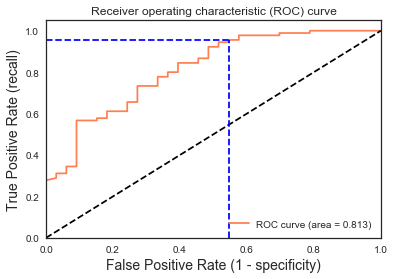

Using a threshold of 0.546 guarantees a sensitivity of 0.956 and a specificity of 0.455, i.e. a false positive rate of 54.55%.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(scaled_X_train, Y_train)
y_pred = logreg.predict(scaled_X_test)
y_pred_proba = logreg.predict_proba(scaled_X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(Y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [45]:
#fit a decision tree classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

pred_clf = clf.predict(X_test)
print(confusion_matrix(Y_test, pred_clf))
print(classification_report(Y_test, pred_clf))



Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.66
[[17 16]
 [26 64]]
              precision    recall  f1-score   support

         0.0       0.40      0.52      0.45        33
         1.0       0.80      0.71      0.75        90

   micro avg       0.66      0.66      0.66       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.69      0.66      0.67       123



In [47]:
#fit a knn classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(scaled_X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(scaled_X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(scaled_X_test, Y_test)))

pred_knn = knn.predict(scaled_X_test)
print(confusion_matrix(Y_test, pred_knn))
print(classification_report(Y_test, pred_knn))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.76
[[14 19]
 [10 80]]
              precision    recall  f1-score   support

         0.0       0.58      0.42      0.49        33
         1.0       0.81      0.89      0.85        90

   micro avg       0.76      0.76      0.76       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.75      0.76      0.75       123



In [49]:
#fit a lda

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(scaled_X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(scaled_X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(scaled_X_test, Y_test)))

pred_lda = lda.predict(scaled_X_test)
print(confusion_matrix(Y_test, pred_lda))
print(classification_report(Y_test, pred_lda))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.81
[[14 19]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.78      0.42      0.55        33
         1.0       0.82      0.96      0.88        90

   micro avg       0.81      0.81      0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



In [51]:
#fit a naive bayes model

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(scaled_X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(scaled_X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(scaled_X_test, Y_test)))

pred_gnb = gnb.predict(scaled_X_test)
print(confusion_matrix(Y_test, pred_gnb))
print(classification_report(Y_test, pred_gnb))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.80
[[14 19]
 [ 5 85]]
              precision    recall  f1-score   support

         0.0       0.74      0.42      0.54        33
         1.0       0.82      0.94      0.88        90

   micro avg       0.80      0.80      0.80       123
   macro avg       0.78      0.68      0.71       123
weighted avg       0.80      0.80      0.79       123



In [53]:
#fit a svm classifier

In [54]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(scaled_X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(scaled_X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(scaled_X_test, Y_test)))

pred_svm = svm.predict(scaled_X_test)
print(confusion_matrix(Y_test, pred_svm))
print(classification_report(Y_test, pred_svm))

Accuracy of SVM classifier on training set: 0.83
Accuracy of SVM classifier on test set: 0.82
[[14 19]
 [ 3 87]]
              precision    recall  f1-score   support

         0.0       0.82      0.42      0.56        33
         1.0       0.82      0.97      0.89        90

   micro avg       0.82      0.82      0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



In [55]:
#fit a random forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_train, Y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, Y_test)))

pred_rfc = rfc.predict(X_test)
print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

Accuracy of Random Forest Classifier on training set: 0.96
Accuracy of Random Forest Classifier on test set: 0.74
[[15 18]
 [14 76]]
              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48        33
         1.0       0.81      0.84      0.83        90

   micro avg       0.74      0.74      0.74       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.73      0.74      0.73       123



In [57]:
# Random Forest feature importance

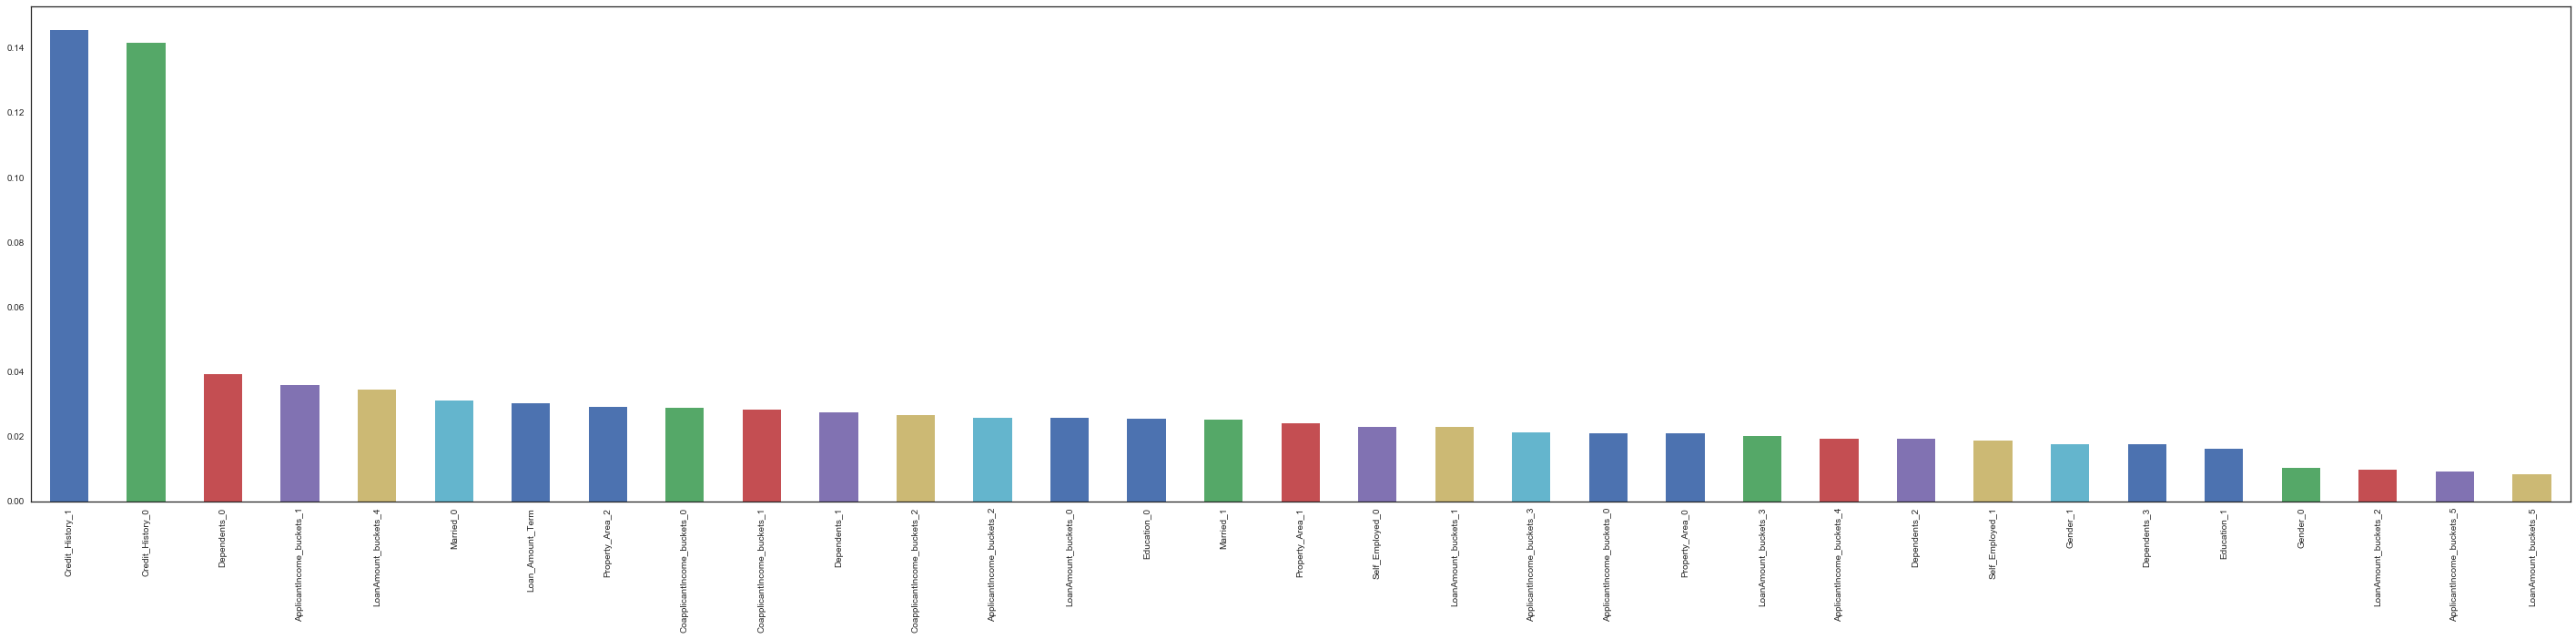

In [58]:
importance = pd.Series(rfc.feature_importances_)
importance.index = X_train_columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(50,10))

In [59]:
#fit a xgboost classifier

Accuracy of XGboost on training set: 0.84
Accuracy of XGboost on test set: 0.83
[[15 18]
 [ 3 87]]
              precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        33
         1.0       0.83      0.97      0.89        90

   micro avg       0.83      0.83      0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



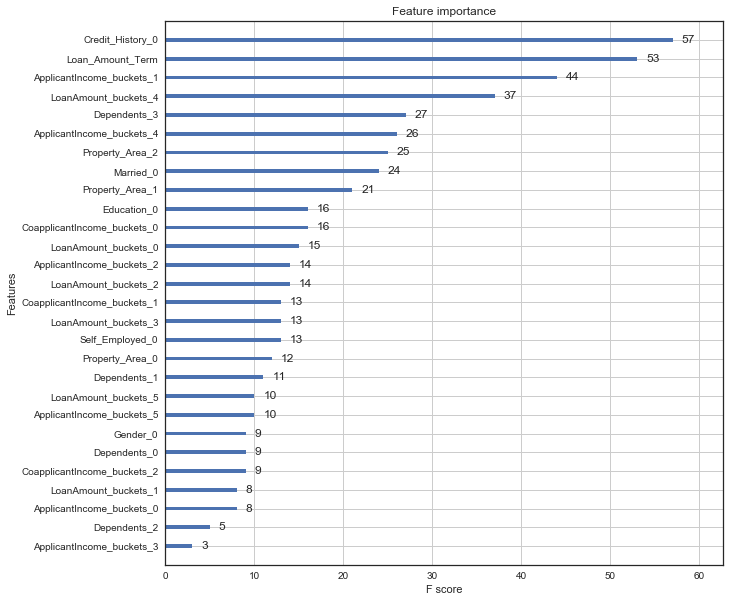

In [60]:
import xgboost as xgb
from xgboost import plot_importance
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test,Y_test)]
xgb_model.fit(X_train,Y_train, eval_set=eval_set, verbose=False)
print('Accuracy of XGboost on training set: {:.2f}'
     .format(xgb_model.score(X_train, Y_train)))
print('Accuracy of XGboost on test set: {:.2f}'
     .format(xgb_model.score(X_test, Y_test)))

pred_xgb = xgb_model.predict(X_test)
print(confusion_matrix(Y_test, pred_xgb))
print(classification_report(Y_test, pred_xgb))
ax = plot_importance(xgb_model)
fig = ax.figure
fig.set_size_inches(10, 10)

In [61]:
#fit a LightGBM classifier

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.4s finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.07, 'n_estimators': 8, 'num_leaves': 20, 'objective': 'binary', 'random_state': 501, 'subsample': 0.7}
0.8044806517311609
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 20, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.64, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}
Overall accuracy of Light GBM model: 0.8292682926829268


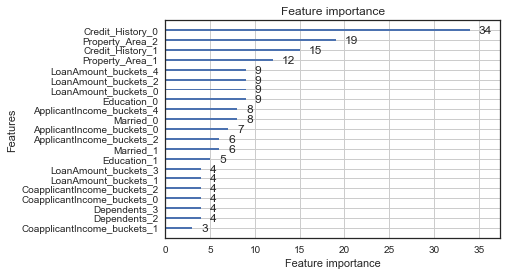

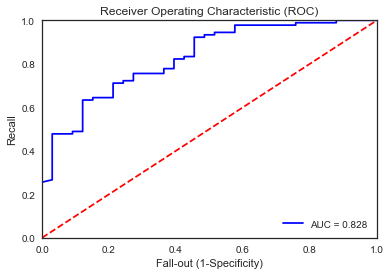

AUC score: 0.8281144781144781


<Figure size 432x288 with 0 Axes>

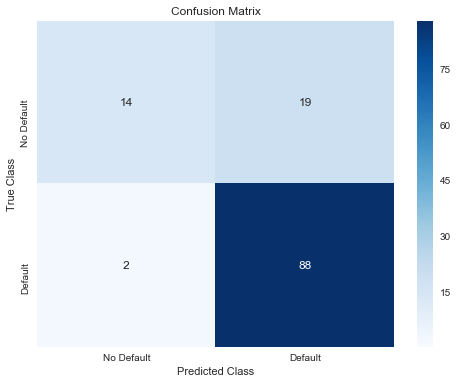

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
train_data=lgb.Dataset(X_train, label=Y_train)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(X_train,Y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(Y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(Y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(Y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [63]:
xgb_model_pred = xgb_model.predict(test_df)
pd.DataFrame(xgb_model_pred).to_csv('xgb_f2.csv',sep=',')

In [64]:
#predictng and writing output file
pred_lgbm = lgbm.predict(test_df)
predictions_lgbm_02 = np.where(pred_lgbm > 0.7272, 1, 0)
pd.DataFrame(predictions_lgbm_02).to_csv('pred_lgbm_f1.csv',sep=',')